## Sectors and Industry

금융시장에서 섹터(Sector)와 업종(Industry / Sub-Industry)은 자산을 구조적으로 이해하고 포트폴리오를 설계하는 기본 단위다. 글로벌 표준인 GICS(산업분류체계)는 큰 범주의 Sector → Industry Group → Industry → Sub-Industry 계층을 제공하여 동일한 경제적 활동을 하는 기업들을 묶어주며, 한국시장에서는 KRX의 섹터 분류가 GICS 섹터의 분류를 참고하여 제작되었는데, 로컬 산업구조와 정책·규제 특성을 더 잘 반영하는 경우가 있어 연구 목적에 따라 둘을 병행해 사용한다. 

한편 테마(Theme) 투자는 기술(예: AI), 환경(ESG), 공급망 같은 횡단적 주제에 따라 섹터·업종 경계를 넘어선 노출을 구성하므로 이벤트 드리븐 전략에서 자주 활용한다. 포트폴리오 집계 방식에서는 동일가중(Equal-weighted)이 대형주 집중을 완화해 섹터 내 분산효과를 키우지만 리밸런싱 비용과 회전율이 커지는 반면, 시가총액가중(Market-weighted)은 시가총액에 비례해 시장노출을 자연스럽게 반영하고 거래비용이 낮아 인덱스 추종에 적합하다. 따라서 실무와 연구에서는 (1) 사용하려는 분류체계(GICS vs KRX), (2) 테마의 정의 및 구성 규칙, (3) 가중치 방식(Equal vs Market), (4) 리밸런싱 빈도·거래비용·유동성 제약을 함께 고려해 실험설계와 해석을 일관되게 맞추는 것이 중요하다.

이번 장에서는 섹터의 종류와 특성을 이해하는 것을 목표로 한다.

### 1. GICS Sectors

GICS(Global Industry Classification Standard)는 기업을 동일한 경제적 활동을 하는 그룹으로 체계화하기 위한 글로벌 분류체계다. 최상위 레벨은 Sector이고 그 아래에 Industry Group → Industry → Sub-Industry 순으로 세분화되어 있다. 

현재 GICS는 11개 섹터(예: Energy, Materials, Industrials, Consumer Discretionary, Consumer Staples, Health Care, Financials, Information Technology, Communication Services, Utilities, Real Estate)로 구성되어 있어 전세계 시장과 자산을 동일한 기준으로 비교·분석할 수 있게 해준다. 연구자와 포트폴리오 매니저는 GICS를 사용해 섹터별 성과, 리스크 분해, 섹터 중립 전략 등을 구현하고 벤치마크와의 일관된 비교를 수행한다. 각 섹터별 표준 티커는 다음과 같다.


| sector                 | ticker  | alias | description                                      |
|:-----------------------|:--------|:-----:|:-------------------------------------------------|
| Energy                 | ^GSPE   |  ENE  | SP500-10으로도 사용하기도 함. 에너지 생산 기업 집합. 지정학적 리스크 및 달러가치에 민감하게 반응 |
| Materials              | ^SP500-15|  MAT  | 소재생산 기업의 집합                                      |
| Industrials            |^SP500-20|  IND  | 산업재, 산업 관련 종목의 집합                                |
| Consumer Discretionary |^SP500-25|  COD  | 사치재, 경제재 생산 기업의 집합                               |
| Consumer Staples       |^SP500-30|  COS  | 필수소비재 생산 기업의 집합. 경기 침체 국면에서 주가 방어의 경향 존재         |
| Health Care Services   |^SP500-35|  HCS  | 의료, 건강 관련 기업의 집합. 금리가 낮은 국면에서 주가가 상승하는 경향 존재     |
| Financials|^SP500-40|FIN| 금융 산업과 관련된 기업의 집합. 경기변화에 굉장히 민감. 금리 변동이 기업의 할인율과 밀접히 연결됨 |
|Information Technology|^SP500-45|INT| 반도체 제조업, 파운드리, 스마트폰 제조 등 지식기반 산업과 정보산업을 주로 하는 기업의 집합.기술의 발전으로 상승률이 가장 높은 섹터임 |
|Communication Services|^SP500-50|COS| 소셜 서비스, 통신, 언론 등의 인간 간 커뮤니케이션 관련 사업을 주로 하는 기업의 집합|
|Utilities|^SP500-55|UTL|유틸리티 관련 사업을 주로 하는 기업의 집합|
|Real Estate|^SP500-60|RES|부동산 관련 입대업, 금융업, 신탁 등의 사업을 영위하는 기업의 집합|

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download(
    [
        '^GSPE', # energy
        '^SP500-15', # materials
        '^SP500-20', # industrials
        '^SP500-25', # consumer discretionary
        '^SP500-30', # consumer staples
        '^SP500-35', # health care services
        '^SP500-40', # financials
        '^SP500-45', # information technology
        '^SP500-50', # communication services
        '^SP500-55', # utilities
        '^SP500-60' # real estate
    ],
    start = '2018-01-01',
    progress = False,
    interval = '1d',
    multi_level_index=False,
    auto_adjust = False
)['Close']

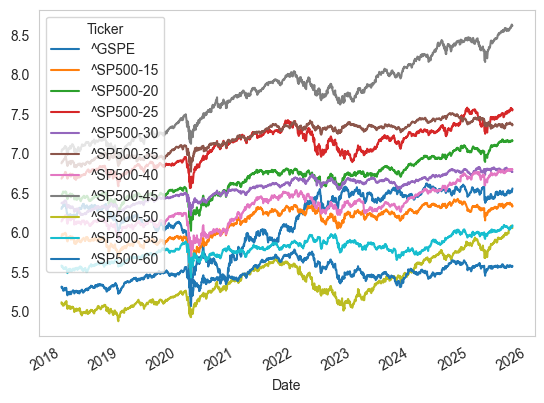

In [9]:
np.log(data).plot(grid = False)
plt.show()

### 2. Industry Groups

GICS(Global Industry Classification Standard)는 기업을 경제적 활동에 따라 체계적으로 분류하기 위해 MSCI와 S&P가 공동으로 개발한 글로벌 표준 분류체계이다. 이 체계는 기업을 Sector → Industry Group → Industry → Sub-Industry 순으로 단계적으로 세분화한다.

현재 GICS는 11개 섹터와 24개 산업그룹(Industry Group)으로 구성되어 있다. Sector는 최상위 구분 단위이고, Industry Group은 섹터를 더 세분화한 중간 단위이다. Industry Group 수준에서는 특정 산업군의 특성을 보다 정밀하게 분석할 수 있으며, 섹터 단위에서는 포착하기 어려운 경기 민감도 차이나 리스크 요인을 구분할 수 있다.

| industry group               | ticker      | alias | description |
|:-----------------------------|:------------|:-----:|:------------|
| Energy                       | ^SP500-10   | ENE  | 에너지 생산 및 관련 기업 |
| Materials                    | ^SP500-15   | MAT  | 소재, 화학, 금속, 광업 등 |
| Capital Goods                | ^SP500-2010 | CAG  | 산업재, 기계, 건설제품 등 |
| Commercial & Professional Svcs | ^SP500-2020 | CPS  | 상업 서비스, 전문 서비스 |
| Transportation               | ^SP500-2030 | TRN  | 항공, 해운, 도로/철도 운송 등 |
| Automobiles & Components     | ^SP500-2510 | AUC  | 자동차 및 부품 |
| Consumer Durables & Apparel  | ^SP500-2520 | CDA  | 가전, 의류, 고급 소비재 |
| Consumer Services            | ^SP500-2530 | CSV  | 호텔, 레스토랑, 레저 서비스 |
| Retailing                    | ^SP500-2550 | RET  | 유통, 온라인/오프라인 소매 |
| Food & Staples Retailing     | ^SP500-3010 | FSR  | 필수소비재 유통 (마트, 약국) |
| Food, Beverage & Tobacco     | ^SP500-3020 | FBT  | 식품, 음료, 담배 |
| Household & Personal Products| ^SP500-3030 | HPP  | 생활용품, 개인용품 |
| Health Care Equipment & Svcs | ^SP500-3510 | HCS  | 의료기기, 서비스 |
| Pharmaceuticals, Biotechnology & Life Sciences | ^SP500-3520 | PBL | 제약, 바이오, 생명과학 |
| Banks                        | ^SP500-4010 | BNK  | 은행 |
| Diversified Financials       | ^SP500-4020 | DIF  | 증권사, 자산운용사, 투자은행 |
| Insurance                    | ^SP500-4030 | INS  | 보험사 |
| Software & Services          | ^SP500-4510 | SWS  | 소프트웨어, IT 서비스 |
| Technology Hardware & Equipment | ^SP500-4520 | THE | 반도체, 스마트폰, 하드웨어 |
| Semiconductors & Semiconductor Equipment | ^SP500-4530 | SEM | 반도체 및 장비 |
| Telecommunication Services   | ^SP500-5010 | TCS  | 통신사 |
| Media & Entertainment        | ^SP500-5020 | MEN  | 미디어, 오락, 소셜 서비스 |
| Utilities                    | ^SP500-55   | UTL  | 전기, 가스, 수자원, 유틸리티 |
| Real Estate                  | ^SP500-60   | RES  | 부동산, 리츠, 임대업 |

In [16]:
industry_tickers = [
    '^SP500-1010',    # Energy
    '^SP500-15',    # Materials
    '^SP500-2010',  # Capital Goods
    '^SP500-2020',  # Commercial & Professional Svcs
    '^SP500-2030',  # Transportation
    '^SP500-2510',  # Automobiles & Components
    '^SP500-2520',  # Consumer Durables & Apparel
    '^SP500-2530',  # Consumer Services
    '^SP500-2550',  # Retailing
    '^SP500-3010',  # Food & Staples Retailing
    '^SP500-3020',  # Food, Beverage & Tobacco
    '^SP500-3030',  # Household & Personal Products
    '^SP500-3510',  # Health Care Equipment & Svcs
    '^SP500-3520',  # Pharmaceuticals, Biotech & Life Sciences
    '^SP500-4010',  # Banks
    '^SP500-4020',  # Diversified Financials
    '^SP500-4030',  # Insurance
    '^SP500-4510',  # Software & Services
    '^SP500-4520',  # Technology Hardware & Equipment
    '^SP500-4530',  # Semiconductors & Equipment
    '^SP500-5010',  # Telecommunication Services
    '^SP500-5020',  # Media & Entertainment
    '^SP500-55',    # Utilities
    '^SP500-60'     # Real Estate
]

In [17]:
industry_group_data = yf.download(
    tickers = industry_tickers,
    start = '2018-01-01',
    progress = False,
    interval = '1d',
    multi_level_index=False,
    auto_adjust = False
)['Close']

<Axes: xlabel='Date'>

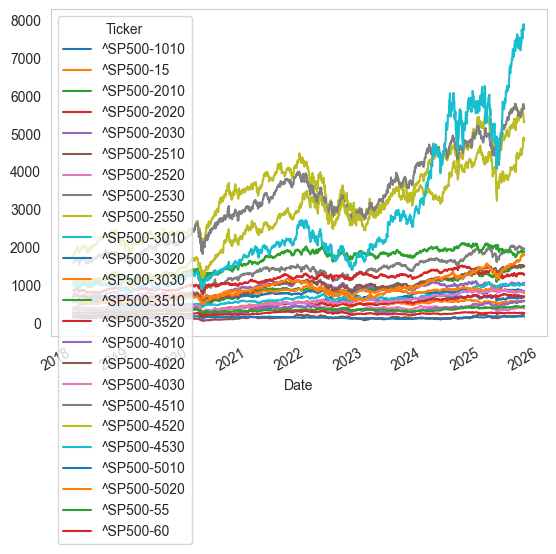

In [18]:
industry_group_data.plot(grid = False)

**Industry Group의 역할**

- 세분화된 비교 분석
    - Industry Group은 동일 섹터 내에서도 산업별 성격 차이를 구체적으로 반영한다. 예를 들어, Industrials 섹터 안의 Transportation과 Capital Goods는 경기 국면에 따라 상반된 민감도를 보인다.
- 리스크 및 성과 파악
    - 포트폴리오 매니저는 Industry Group 단위에서 성과와 리스크를 분석한다. 금융 섹터를 Banks, Insurance, Diversified Financials로 나누면 금리, 신용, 시장 리스크를 분리해 이해할 수 있다.
- 투자 전략 활용
    - Industry Group은 팩터 모델이나 자산배분 전략과 결합되어 활용된다. 섹터 중립 전략, 인더스트리 그룹 로테이션 전략, 벤치마크 대비 초과성과 분석 등에 유용하게 쓰인다.

### 3. Themes

**Theme** 는 특정 산업이나 트렌드, 혁신 기술, 사회·환경적 변화와 같이 전통적인 섹터 분류를 넘어서는 주제에 따라 기업을 묶어 투자하는 상장지수펀드이다. 기존의 ETF가 주로 시장지수(S&P500, KOSPI200 등)나 섹터 지수를 추종하는 데 비해, 테마 ETF는 전기차, 인공지능, 클라우드, 바이오테크, 친환경 에너지 등과 같은 특정 주제를 중심으로 종목을 선정한다. 따라서 테마 ETF는 경기순환에 따라 움직이는 전통 섹터 구분을 보완하고, 구조적 성장 산업이나 사회적 메가트렌드에 집중적으로 투자할 수 있는 수단이 된다.

Theme ETF의 가장 큰 특징은 트렌드를 반영한다는 점이다. 사회적·기술적 변화가 가속화되면서 전기차 보급 확대, 친환경 전환, 디지털화와 같은 장기적 추세가 기업 성과와 시장 가격에 미치는 영향이 커졌다. 테마 ETF는 이러한 메가트렌드를 반영해 섹터 경계를 초월한 기업들을 하나의 바스켓으로 묶는다. 예를 들어 전기차 ETF에는 자동차 제조업체뿐만 아니라 배터리 소재 기업, 반도체 기업, 충전 인프라 기업 등이 동시에 포함된다.

또 다른 특징은 지수 기반과 액티브 운용의 구분이다. 다수의 테마 ETF는 Solactive, Indxx, MSCI, S&P, NASDAQ 등 글로벌 지수 제공사가 산출하는 테마 인덱스를 추종한다. 예컨대 ICLN은 S&P Global Clean Energy Index를, LIT은 Solactive Global Lithium Index를, CIBR은 NASDAQ CTA Cybersecurity Index를 따른다. 그러나 ARK Invest 시리즈(ARKK, ARKG, ARKF 등)는 지수를 따르지 않고 운용사의 리서치에 기반한 액티브 방식으로 운용된다. 이런 경우 지수 대신 운용사의 판단이 곧 인덱스 역할을 하게 된다.


| theme                   | ticker     | alias | index name                                           | description |
|:-------------------------|:-----------|:-----:|:----------------------------------------------------|:------------|
| Technology / Innovation | QQQ        | QQQ  | NASDAQ-100 Index                                    | 나스닥100 추종 ETF. 기술주 중심의 대표 성장 테마 ETF |
| Artificial Intelligence | BOTZ       | BOTZ | Indxx Global Robotics & Artificial Intelligence Thematic Index | 로보틱스와 인공지능 관련 기업에 투자 |
| Cloud Computing         | CLOU       | CLOU | Indxx Global Cloud Computing Index                  | 클라우드 인프라 및 서비스 기업 투자 |
| Cybersecurity           | CIBR       | CIBR | NASDAQ CTA Cybersecurity Index                      | 사이버 보안 관련 기업 집중 투자 |
| Semiconductor           | SOXX       | SOXX | ICE Semiconductor Index                             | 반도체 및 장비 기업에 투자 |
| Clean Energy            | ICLN       | ICLN | S&P Global Clean Energy Index                       | 친환경 에너지, 재생에너지 관련 기업에 투자 |
| Electric Vehicles (EV)  | DRIV       | DRIV | Solactive Autonomous & Electric Vehicles Index      | 전기차 및 자율주행 관련 기업에 투자 |
| Genomics / Biotech      | ARKG       | ARKG | Active (no index, ARK managed)                     | 유전자 혁신, 바이오테크 관련 기업 (액티브 ETF) |
| Space Exploration       | ARKX       | ARKX | Active (no index, ARK managed)                     | 우주 산업 및 관련 기업 투자 (액티브 ETF) |
| FinTech                 | ARKF       | ARKF | Active (no index, ARK managed)                     | 핀테크 및 디지털 금융 혁신 기업 (액티브 ETF) |
| Blockchain / Crypto     | BLOK       | BLOK | Active (actively managed thematic ETF)             | 블록체인 관련 기업과 암호화폐 인프라 기업 투자 |
| e-Commerce              | ONLN       | ONLN | ProShares Online Retail Index                      | 온라인 리테일 및 e커머스 기업 ETF |
| Gaming & eSports        | HERO       | HERO | Solactive Video Games & Esports Index              | 게임 및 e스포츠 관련 기업 투자 |
| Infrastructure          | PAVE       | PAVE | Indxx US Infrastructure Development Index          | 미국 인프라 투자 및 건설 관련 기업 ETF |
| Lithium & Battery Tech  | LIT        | LIT  | Solactive Global Lithium Index                     | 리튬과 2차전지 관련 기업 투자 |
| Gen Z / Millennial Consumption | MILN | MILN | Indxx Millennials Thematic Index    |

테마는 섹터 포트폴리오 운용에서 시기에 따라 달라지는 트랜드별 성과를 올리는 데 도움을 줄 수 있다. 따라서, 운용에 있어서도 테마의 영향력을 완전히 무시하기는 어렵다

In [19]:
theme_tickers = [
    "QQQ",    # Technology / Innovation
    "BOTZ",   # Artificial Intelligence
    "CLOU",   # Cloud Computing
    "CIBR",   # Cybersecurity
    "SOXX",   # Semiconductor
    "ICLN",   # Clean Energy
    "DRIV",   # Electric Vehicles (EV)
    "ARKG",   # Genomics / Biotech
    "ARKX",   # Space Exploration
    "ARKF",   # FinTech
    "BLOK",   # Blockchain / Crypto
    "ONLN",   # e-Commerce
    "HERO",   # Gaming & eSports
    "PAVE",   # Infrastructure
    "LIT",    # Lithium & Battery Tech
    "MILN"    # Gen Z / Millennial Consumption
]

In [28]:
theme_data = yf.download(
    theme_tickers,
    start='2018-01-01',
    progress = False,
    interval = '1d',
    multi_level_index=False,
    auto_adjust = False
)['Close']

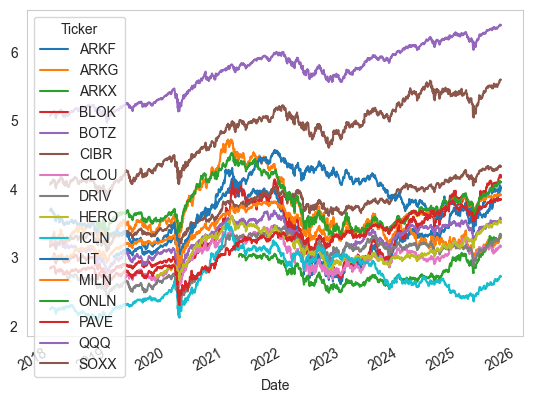

In [31]:
np.log(theme_data).plot(grid = False)
plt.show()